### 3. SVM (Support Vector Machine, 서포트 벡터 머신) ⚡
데이터를 고차원 공간으로 변형하여 두 그룹을 나누는 경계선(초평면, Hyperplane)을 찾음.

In [1]:
# 라이브러리

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# 1. 데이터 불러오기
df = pd.read_csv(r"../iris.csv")  # CSV 파일 읽기

In [3]:
# 2. X(features), y(target) 분리 / train, test 분리(8:2 비율)
X = df.drop(columns=["Name"])
# X = df.iloc[:, :2]  # X의 속성을 2개만 남김(결과를 2차원 시각화 가능해짐)
y = df["Name"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# 4. **데이터 표준화 (SVM은 거리 기반 알고리즘이라 표준화가 중요!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# 5. SVM 모델 생성 (기본 선형 커널), 모델 학습
svm_model = SVC(kernel="linear", C=10, random_state=42)
    # C: 마진. C가 작을수록 마진이 커지고, 마진이 클수록 훈련 데이터에 맞아져 과적합 가능성 증가
    # kernel="linear": 커널 종류가 선형. 자료들을 나누는 구분선 형태를 선형/비선형(곡선 등) 등에서 하나를 선택하는 것. rbf, poly, sigmoid 등 다양함.

svm_model.fit(X_train, y_train)

SVC(C=10, kernel='linear', random_state=42)

In [6]:
# 6. 예측 및 정확도 평가
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM 테스트 정확도: {accuracy:.2f}")  # 0~1 사이의 정확도 출력


SVM 테스트 정확도: 0.97


In [7]:
# 7. 교차 검증 평가 (5-Fold Cross Validation)
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print(f"SVM 교차 검증 정확도 평균: {cross_val_scores.mean():.2f}")


SVM 교차 검증 정확도 평균: 0.96


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

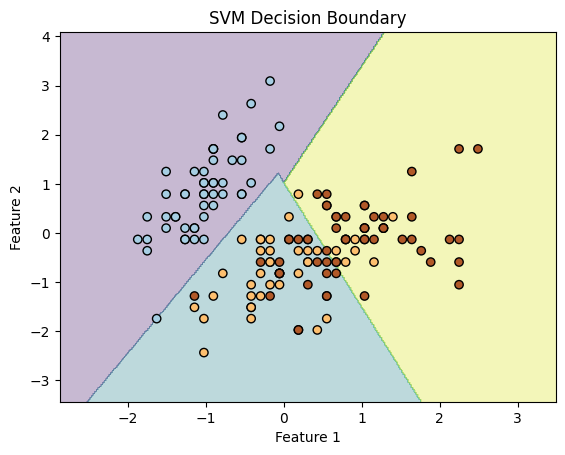

In [ ]:
# 외전. 결정 경계 방식으로 SVM 모델(처음부터 다시 생성) 예측 결과 시각화

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. 붓꽃 데이터 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # 첫 번째, 두 번째 특성만 사용 (2D 시각화를 위해)
y = iris.target

# 2. 데이터 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. SVM 모델 생성 (RBF 커널 사용)
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# 5. 결정 경계 시각화 함수
def plot_decision_boundary(X, y, model):
    h = 0.02  # 그래프 해상도
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)  # 결정 경계
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
    plt.show()

# 6. 그래프 출력
plot_decision_boundary(X, y, model)